In [1]:
import torch.nn as nn
import torch

In [2]:
torch.cuda.empty_cache() 

In [3]:
torch.cuda.is_available()

True

%%bash
git commit -a -m "studying basic stats further  "

https://www.rileynwong.com/blog/2019/2/25/generating-music-with-an-lstm-neural-network

In [4]:
from IPython.core.debugger import Pdb

# basic library loading

In [5]:
from plotnine import *

import pandas as pd

import numpy as np

# data preparation

In [6]:
max_sequence_length = 100

In [7]:
def split_list(l, n):
    """
    リストをサブリストに分割する
    :param l: リスト
    :param n: サブリストの要素数
    :return: 
    """
    for idx in range(0, len(l), n):
        yield l[idx:idx + n]

In [8]:
import glob

In [9]:
import score2df

In [10]:
from importlib import reload

In [36]:
reload(score2df)

<module 'score2df' from '/home/toshinao/PycharmProjects/deepjazz_in_a_file/score2df.py'>

## 差分バージョン

is_difference_based = True

In [50]:
run_mode = 'major'
#run_mode = 'minor'
#run_mode = None

In [25]:
is_discrete = True

In [26]:
from music21 import converter, instrument, note, chord

In [47]:
#id = str(is_difference_based) + "_"  + str(is_discrete)
id = str(is_discrete) 

In [30]:
pkl_path = 'saved/seq_df_scores_{}.pkl'.format(id)

In [51]:
is_use_preprocessed_df = True

In [56]:
df_scores = pd.DataFrame()
if is_use_preprocessed_df:
    df_scores = pd.read_pickle(pkl_path)
else:
    for file in glob.glob("chorales/midi/*.mid"):
        df_score = score2df.score2dataframe(file)
        df_score = score2df.add_sequential_diffs(df_score)
        df_score = df_score.assign(file = file)
        df_scores = df_scores.append(df_score , ignore_index = True )
        
    df_scores.to_pickle(pkl_path)

In [57]:
if run_mode == 'major':
    df_scores = df_scores.query("mode == 'major'")

if run_mode == 'minor':
    df_scores = df_scores.query("mode == 'minor'")

# developing 

In [59]:
df_scores.query("mode == 'major'").shape

(159903, 9)

In [44]:
df_scores.query("mode == 'minor'").shape

(80339, 9)

In [18]:
from music21 import converter
for file in glob.glob("chorales/midi/*.mid"):
    score = converter.parse(file)
    key = score.analyze('key')
    print(key.tonic.name, key.mode)

F major
B minor
F major
G major
G minor
G major
D major
D major
A major
B minor
E- major
A minor
D minor
C major
G major
B- major
G minor
D major
A minor
A minor
B- major
D minor
G major
D major
A minor
D minor
E- major
E major
F major
E major
G minor
A minor
B minor
A minor
C major
B minor
F major
A major
G major
B minor
B- major
D major
F major
G major
A minor
C major
G major
A major
D minor
F# minor
D minor
B- major
E minor
C major
D major
A major
E- major
E major
B minor
A minor
B- minor
E minor
E minor
G major
C major
D minor
G major
B minor
A minor
G minor
B- major
D major
G minor
E minor
D minor
B minor
C major
G minor
A major
G major
C major
E minor
B- major
D major
D minor
A minor
G minor
G major
A major
D minor
G major
F major
C major
A minor
D major
C minor
C major
C major
G major
C minor
G minor
E major
G major
A minor
D minor
D minor
A major
E- major
B minor
B- major
C minor
F major
G major
A major
G minor
B- major
B minor
G major
G minor
A minor
F major
E minor
D major
A 

In [56]:
 file = [f for f in glob.glob("chorales/midi/*.mid")][5]

In [57]:
file

'chorales/midi/061500b_.mid'

In [58]:
from music21 import interval

In [59]:
def score2dataframe(file):
    """
    create data frame from midi file
    
    Parameters
    ----------
    file : string
        file path to a midi file
    
    Returns
    -------
    pandas data frame whose columns are
        pitch : pitch of each note
        time : time from the start of each note
        cent : pitch as interger relative to C4
        n : for example, 1 if a note is the second from the lowest among the simultaneously pressed notes
        dcent: the difference of cent from the previous note after grouping by n

    """
    

In [60]:
    
    run_midi = converter.parse(file)
    notes_to_parse = None
    max_simultaneous = 4
    #pitches = [[] for i in range(max_simultaneous)]
    #times = [[] for i in range(max_simultaneous)]
    #diffs = [[] for i in range(max_simultaneous)]
    pitches = []
    times = []
    diffs = []

In [61]:
    
    repartitioned = instrument.partitionByInstrument(run_midi)
    if repartitioned: # file has instrument parts
        notes_to_parse = repartitioned.parts[0].recurse()
    else: # file has notes in a flat structure
        notes_to_parse = run_midi.flat.notes
        
        

In [64]:
    for element in notes_to_parse:
        
        if isinstance(element, note.Note):        
            #run_notes = [element]
            pitches.append(str(element.pitch))
            diffs.append(interval.notesToChromatic(note.Note("C4") , element).cents)
            times.append(float(element.offset))
        elif isinstance(element, chord.Chord):           
            run_chord = element
            #print("chord")
            common_name = run_chord.commonName
            print("chord {}".format(common_name))
            posiitons = [interval.notesToChromatic(note.Note("C4") , run_chord.notes[i]).cents for i in range(min(len(element.normalOrder) , max_simultaneous))]
            for i in range(min(len(element.normalOrder) , max_simultaneous)):
                pitches.append(element.pitches[i])
                diffs.append(interval.notesToChromatic(note.Note("C4") , run_chord.notes[i]).cents)
                times.append(float(element.offset))
               

chord Major Sixth
chord Minor Thirteenth
chord Perfect Fifth
chord Minor Third
chord Minor Sixth
chord Major Sixth
chord Major Ninth
chord Minor Sixth
chord Major Sixth
chord Major Sixth
chord Minor Tenth
chord Major Sixth
chord Major Sixth
chord Minor Tenth
chord Minor Third
chord Minor Third
chord Minor Third
chord major triad
chord incomplete dominant-seventh chord
chord major triad
chord diminished triad
chord major triad
chord incomplete dominant-seventh chord
chord major triad
chord Minor Third
chord Minor Seventh
chord Augmented Fifth
chord Minor Sixth
chord Minor Third
chord Minor Third
chord Minor Third
chord Minor Third
chord Minor Third
chord major triad
chord incomplete dominant-seventh chord
chord major triad
chord diminished triad
chord major triad
chord incomplete dominant-seventh chord
chord major triad
chord Minor Third
chord Minor Third
chord Perfect Fifth
chord Minor Third
chord Major Seventh
chord Perfect Fourth
chord incomplete dominant-seventh chord
chord Major Si

In [ ]:
    df_score = pd.DataFrame({'pitch' : pitches , 'time' : times , 'cent' : diffs })
    df_score.sort_values(['time' , 'cent'] , inplace=True)

    df_score = df_score.assign(n = df_score.groupby('time').cumcount())

    df_score = df_score.assign(dcent = df_score.groupby('n').cent.diff())
    return df_score

## dtを0か0.25だけにする(optional)

In [17]:
df_scores = df_scores.assign(dt = np.where(df_scores.dt > 0.001 , 0.25 , df_scores.dt))

In [18]:
df_scores = df_scores.assign(dt = np.where(df_scores.dt > 2.0 , np.nan , df_scores.dt))

In [19]:
df_scores.dropna(subset = ['dcent', 'dt'] , inplace=True)

## tmp

In [ ]:
df_scores.head()

In [ ]:
tmp = list()
for file in glob.glob("chorales/midi/*.mid"):
    midi = converter.parse(file)
    
    parts = instrument.partitionByInstrument(midi)
    #parts = instrument.partitionByIntrument(midi)
    if not parts:
        tmp.append(file)

In [ ]:
tmp

## have a look at the data

In [20]:
df_scores.head()

,pitch,time,cent,n,dcent,dt,file
1,A3,3.0,-300.0,1,1600.0,0.00,chorales/midi/028100b_.mid
2,C4,3.0,0.0,2,300.0,0.00,chorales/midi/028100b_.mid
3,F4,3.0,500.0,3,500.0,0.00,chorales/midi/028100b_.mid
4,F3,4.0,-700.0,0,1200.0,0.25,chorales/midi/028100b_.mid
5,C4,4.0,0.0,1,700.0,0.00,chorales/midi/028100b_.mid


In [21]:
df_scores.describe()

,time,cent,n,dcent,dt
count,239298.000000,239298.000000,239298.000000,239298.000000,239298.000000
mean,103.605256,192.513101,1.329142,440.044213,0.096788
std,129.275882,971.585696,1.546210,1009.269247,0.121775
min,0.000000,-3600.000000,0.000000,-5300.000000,0.000000
25%,27.000000,-500.000000,0.000000,0.000000,0.000000
50%,53.000000,200.000000,1.000000,400.000000,0.000000
75%,125.000000,900.000000,2.000000,900.000000,0.250000
max,906.000000,3100.000000,14.000000,5500.000000,0.250000


In [ ]:
ggplot(df_scores , aes(x = 'dt' , y = 'dcent' , color = 'n')) + geom_point() + theme_minimal()

In [ ]:
ggplot(df_scores.query('dt != 0') , aes(fill = 'n' , x = 'dcent / 100')) + geom_histogram() + theme_minimal()

In [ ]:
len(set(df_scores.query('abs(dcent/100)>20 & n != 0')['file']))

In [ ]:
from IPython.display import Image

Image(filename=converter.parse('chorales/midi/000101b_.mid').write('lily.png'))

In [ ]:
ggplot(df_scores.query('dt == 0') , aes(fill = 'n' , x = 'dcent / 100')) + geom_histogram() + theme_minimal()

In [ ]:
ggplot(df_scores.query('dt == 0') , aes(color = 'n' , x = 'dcent')) + geom_histogram() + facet_wrap('~n') + theme_void()

## preprocess 2

In [60]:
if is_discrete:
    dtype = str
else:
    dtype = np.float64

In [61]:
notes_list = []
dt_list = []
for f in set(df_scores.file):
    df_file = df_scores[df_scores.file == f]

    run_notes = df_file.dcent.astype(dtype)
    run_dts = df_file.dt.astype(dtype)
    for n in split_list(run_notes , max_sequence_length):
        if len(n) > 10:
            notes_list.append(n)
    for n in split_list(run_dts , max_sequence_length):
        if len(n) > 10:
            dt_list.append(n)
        

In [22]:
len(dt_list)

2587

#### linear regresssion


https://www.statsmodels.org/dev/example_formulas.html

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
mod = smf.ols(formula = 'dcent ~ dt' , data = df_scores)

In [ ]:
res = mod.fit()

print(res.summary())

https://towardsdatascience.com/how-to-generate-music-using-a-lstm-neural-network-in-keras-68786834d4c5

## pre-pack procedures

In [62]:
from music21 import converter, instrument, note, chord

### with label encoding (for discrete version)
https://towardsdatascience.com/encoding-categorical-features-21a2651a065c
に概ね準拠仕様と思ったが・・・

- そもそもlabelencoder -> onehot  は今後必要ないよとwarning が出る
- onehot の挙動が読みにくい

のでlabelencodingしたあと直にnp.arrayをmanual onehote化したほうがいいのではないか？？

In [63]:
raw_y1, raw_X1 , le1 = score2df.yx_encoder(notes_list)

In [64]:
raw_y2, raw_X2 , le2 = score2df.yx_encoder(dt_list)

In [65]:
raw_X = [torch.cat((raw_X1[i] , raw_X2[i]) , 1) for i in range(len(raw_X1))]

## pad and pack

In [66]:
packed_X = torch.nn.utils.rnn.pack_sequence(raw_X , enforce_sorted=False)

ppd_X = torch.nn.utils.rnn.pad_packed_sequence(packed_X)

In [67]:
packed_y1 = torch.nn.utils.rnn.pack_sequence(raw_y1 , enforce_sorted=False)

ppd_y1 = torch.nn.utils.rnn.pad_packed_sequence(packed_y1)

In [68]:

packed_y2 = torch.nn.utils.rnn.pack_sequence(raw_y2 , enforce_sorted=False)

ppd_y2 = torch.nn.utils.rnn.pad_packed_sequence(packed_y2)

### reference

- [OneHotEncoderだけでいける。LabelEncoderをかます必要なし]と当初思っていたがむしろ逆



https://stackoverflow.com/questions/30869382/encoding-string-to-numbers-so-as-to-use-it-in-scikit-learn

Another possible good reference:
https://stackoverflow.com/questions/30869382/encoding-string-to-numbers-so-as-to-use-it-in-scikit-learn


## mask

In [69]:
mask = torch.Tensor([len(x) - 1 for x in notes_list])
                     

or

In [70]:
mask = ppd_X[1]

# LTSM

参考文献のpreprocessはあまり納得いかないので・・

https://pytorch.org/tutorials/beginner/nlp/sequence_models_tutorial.html

をみつつやってみるか

## 参考文献に似せたモデル
https://towardsdatascience.com/how-to-generate-music-using-a-lstm-neural-network-in-keras-68786834d4c5
に似せたモデル


softmaxを二重にかけないように注意

In [71]:
class my_model(nn.Module):

    def __init__(self, input_size1 , input_size2, hidden_size, num_layers , dropout):
        #super(my_model, self).__init__()
        
        super().__init__()

        self.relu = nn.ReLU()
        
        input_size = input_size1 + input_size2
        


        self.rnn = nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers , dropout=dropout)

        self.linear1 = nn.Linear(hidden_size, input_size1) #output dimension has to be identical with the input dimension
        
        self.linear2 = nn.Linear(hidden_size, input_size2) #output dimension has to be identical with the input dimension
 
        self.linear1b = nn.Linear(input_size1, input_size1) #output dimension has to be identical with the input dimension
        
        self.linear2b = nn.Linear(input_size2, input_size2) #output dimension has to be identical with the input dimension
  
     


    def forward(self, input):
        #self.h0 = torch.randn(self.num_layers , sequence_num , self.hidden_size)
        #self.c0 = torch.randn(self.num_layers , sequence_num, self.hidden_size)
        y, (hn, cn) = self.rnn(input)#, (self.h0, self.c0))
        y1 = self.linear1(y)
        y1 = self.relu(y1)
        y1 = self.linear1b(y1)
        y2 = self.linear2(y)
        y2 = self.relu(y2)
        y2 = self.linear2b(y2)
       
        return y1,y2
    

In [72]:
input_size1 = raw_X1[0].shape[1]
input_size2 = raw_X2[0].shape[1]
hidden_size = 512 
num_layers = 2
dropout = 0.1

In [73]:
model = my_model(input_size1 , input_size2 , hidden_size , num_layers , dropout)

## dimensionality check

In [74]:
y_tmp1 ,y_tmp2 = model.forward(ppd_X[0][:, 0:10])

In [ ]:
y_tmp1.shape

In [ ]:
y_tmp2.shape

##    連続バージョン

https://stackoverflow.com/questions/49040180/change-tanh-activation-in-lstm-to-relu

In [ ]:
class LSTMCell(nn.Module):
    def __init__(self, input_size, hidden_size, nlayers, dropout):
        """"Constructor of the class"""
        super(LSTMCell, self).__init__()

        self.nlayers = nlayers
        self.dropout = nn.Dropout(p=dropout)

        ih, hh = [], []
        for i in range(nlayers):
            ih.append(nn.Linear(input_size, 4 * hidden_size))
            hh.append(nn.Linear(hidden_size, 4 * hidden_size))
        self.w_ih = nn.ModuleList(ih)
        self.w_hh = nn.ModuleList(hh)

    def forward(self, input, hidden):
        """"Defines the forward computation of the LSTMCell"""
        hy, cy = [], []
        for i in range(self.nlayers):
            hx, cx = hidden[0][i], hidden[1][i]
            gates = self.w_ih[i](input) + self.w_hh[i](hx)
            i_gate, f_gate, c_gate, o_gate = gates.chunk(4, 1)

            i_gate = F.sigmoid(i_gate)
            f_gate = F.sigmoid(f_gate)
            c_gate = F.tanh(c_gate)
            o_gate = F.sigmoid(o_gate)

            ncx = (f_gate * cx) + (i_gate * c_gate)
            nhx = o_gate * F.tanh(ncx)
            cy.append(ncx)
            hy.append(nhx)
            input = self.dropout(nhx)

        hy, cy = torch.stack(hy, 0), torch.stack(cy, 0)
        return hy, cy

# criterion (cross entropy lossはlog softmaxを含んでいるので二重に作用させないよう注意が必要）

cross entropy for one-hot representation
https://discuss.pytorch.org/t/cross-entropy-with-one-hot-targets/13580/4

one-hotのままでなくて、Rでいうところのfactorに戻したほうがよさそう（？）


In [75]:
criterion = nn.CrossEntropyLoss(reduction='sum')


input has to be a Tensor of size either (minibatch, C)(minibatch,C) or (minibatch, C, d_1, d_2, ..., d_K)

# GPU tool

In [76]:
is_use_gpu = True


In [77]:
device = torch.device("cuda" if torch.cuda.is_available() and is_use_gpu else "cpu")

In [78]:
cpu = torch.device("cpu")

# optimizer

In [79]:
import torch.optim as optim# optimizer

In [80]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [81]:
optimizer = optim.Adam(model.parameters())

# optimization

In [82]:
from IPython.display import display

In [83]:
sample_size = ppd_X[0].shape[1]

In [84]:
print("sample size : {}".format(sample_size))

sample size : 1708


In [85]:
batch_size = 20

In [86]:
batch_indices = range( 0 ,sample_size ,  batch_size)

## n epochs

In [87]:
losses1 = []
losses2 = []

In [88]:
prob_when_random1 = 1 /input_size1

In [89]:
prob_when_random2 = 1 / input_size2

In [50]:
reload(score2df)

<module 'score2df' from '/home/toshinao/PycharmProjects/deepjazz_in_a_file/score2df.py'>

In [93]:
#model_path = 'saved/model20191124_{}'.format(id)

#model_path = 'saved/model20191125_{}'.format(id)

# model_path = 'saved/model20191207_{}'.format(id)


#model_path = 'saved/model20191208b_{}'.format(id)



model_path = 'saved/model20191230_{}_{}'.format(id,str(run_mode))

In [94]:
n_epochs = 200

In [95]:
model.to(device)
model.train()
for k in range(n_epochs):
    batch_loss1 = 0
    batch_loss2 = 0

    shuffled_idx = torch.randperm(sample_size)
    for i in batch_indices:
        #display(".")
        batch_samples = shuffled_idx[i:min(i + batch_size , sample_size) ]

        loss1, loss2 = score2df.batch_loss_2vars(ppd_y1, ppd_y2 , ppd_X , mask , batch_samples , device , model , criterion)
        batch_loss1 += loss1.item()
        batch_loss2 += loss2.item()
        loss = loss1 + loss2

        
        loss.backward()

        optimizer.step()
    batch_loss1 /= torch.sum(mask).item()
    losses1.append(batch_loss1)
    mean_correct_prob1 = np.exp(-batch_loss1)
    batch_loss2 /= torch.sum(mask).item()
    losses2.append(batch_loss2)
    mean_correct_prob2 = np.exp(-batch_loss2)    
    if k % 10 == 0:
        torch.save(model.state_dict() , model_path)
        display("epoch : {}".format(k))
        display("  [dcent] loss : {}   correct prob : {} correct / random : {}".format(batch_loss1 ,
                                                                        mean_correct_prob1 ,
                                                                        mean_correct_prob1 / prob_when_random1))
        
        display("  [dt] loss : {}   correct prob : {} correct / random : {}".format(batch_loss2 ,
                                                                        mean_correct_prob2 ,
                                                                        mean_correct_prob2 / prob_when_random2))

model.cpu()
torch.cuda.empty_cache() 

'epoch : 0'

'  [dcent] loss : 3.557185984404663   correct prob : 0.028518964715165955 correct / random : 3.0800481892379232'

'  [dt] loss : 1.4065573696093627   correct prob : 0.244985226658301 correct / random : 14.69911359949806'

'epoch : 10'

'  [dcent] loss : 3.1358174589785044   correct prob : 0.04346420909513266 correct / random : 4.6941345822743274'

'  [dt] loss : 0.7335707205983775   correct prob : 0.4801912962601702 correct / random : 28.811477775610214'

'epoch : 20'

'  [dcent] loss : 2.6381352661885975   correct prob : 0.07149446347555923 correct / random : 7.721402055360397'

'  [dt] loss : 0.5330857123236286   correct prob : 0.586791503426179 correct / random : 35.20749020557074'

'epoch : 30'

'  [dcent] loss : 2.2708738395885244   correct prob : 0.10322194124304442 correct / random : 11.147969654248797'

'  [dt] loss : 0.41971041642719953   correct prob : 0.6572371173328238 correct / random : 39.43422703996943'

'epoch : 40'

'  [dcent] loss : 1.8902177459374012   correct prob : 0.15103891714488693 correct / random : 16.31220305164779'

'  [dt] loss : 0.3073792777523891   correct prob : 0.7353716379063716 correct / random : 44.122298274382295'

'epoch : 50'

'  [dcent] loss : 1.4957632366627611   correct prob : 0.22407751527301065 correct / random : 24.200371649485152'

'  [dt] loss : 0.21581266722145798   correct prob : 0.805886256645296 correct / random : 48.35317539871776'

'epoch : 60'

'  [dcent] loss : 1.1195645058077737   correct prob : 0.32642191852345903 correct / random : 35.253567200533574'

'  [dt] loss : 0.1562686960117441   correct prob : 0.8553293359106261 correct / random : 51.319760154637564'

'epoch : 70'

'  [dcent] loss : 0.7945793689932368   correct prob : 0.45177122394690916 correct / random : 48.79129218626619'

'  [dt] loss : 0.11754032959988592   correct prob : 0.8891046537884404 correct / random : 53.346279227306425'

'epoch : 80'

'  [dcent] loss : 0.5487087401957512   correct prob : 0.5776952836759702 correct / random : 62.39109063700479'

'  [dt] loss : 0.08974378752682032   correct prob : 0.9141653758405139 correct / random : 54.84992255043084'

'epoch : 90'

'  [dcent] loss : 0.3680711089793385   correct prob : 0.6920679676921572 correct / random : 74.74334051075297'

'  [dt] loss : 0.06997623158149979   correct prob : 0.9324159816958411 correct / random : 55.94495890175046'

'epoch : 100'

'  [dcent] loss : 0.2573722832837714   correct prob : 0.7730803552930374 correct / random : 83.49267837164804'

'  [dt] loss : 0.055241293404000864   correct prob : 0.9462567948814509 correct / random : 56.77540769288705'

'epoch : 110'

'  [dcent] loss : 0.19364644725759125   correct prob : 0.8239491622639352 correct / random : 88.98650952450501'

'  [dt] loss : 0.04568565264851058   correct prob : 0.9553422242929164 correct / random : 57.32053345757498'

'epoch : 120'

'  [dcent] loss : 0.16513573703123147   correct prob : 0.8477786213243961 correct / random : 91.56009110303478'

'  [dt] loss : 0.04015372528718292   correct prob : 0.9606417528717159 correct / random : 57.638505172302956'

'epoch : 130'

'  [dcent] loss : 0.13292782120115487   correct prob : 0.875528284408095 correct / random : 94.55705471607428'

'  [dt] loss : 0.03353025673273488   correct prob : 0.9670256517520642 correct / random : 58.02153910512386'

'epoch : 140'

'  [dcent] loss : 0.13064098742581154   correct prob : 0.8775327631414294 correct / random : 94.77353841927437'

'  [dt] loss : 0.033659575320067164   correct prob : 0.9669006054464456 correct / random : 58.01403632678674'

'epoch : 150'

'  [dcent] loss : 0.12901099611924166   correct prob : 0.8789643002961879 correct / random : 94.9281444319883'

'  [dt] loss : 0.032382464343244335   correct prob : 0.9681362336723994 correct / random : 58.08817402034396'

'epoch : 160'

'  [dcent] loss : 0.10526454815097369   correct prob : 0.900086374900693 correct / random : 97.20932848927485'

'  [dt] loss : 0.027527861761869537   correct prob : 0.9728475769283268 correct / random : 58.370854615699606'

'epoch : 170'

'  [dcent] loss : 0.10148452601880141   correct prob : 0.9034951599011702 correct / random : 97.5774772693264'

'  [dt] loss : 0.027491179051193287   correct prob : 0.9728832642690736 correct / random : 58.37299585614441'

'epoch : 180'

'  [dcent] loss : 0.10557422026598158   correct prob : 0.8998076864025432 correct / random : 97.17923013147467'

'  [dt] loss : 0.028636750539747378   correct prob : 0.9717693950700477 correct / random : 58.30616370420286'

'epoch : 190'

'  [dcent] loss : 0.09747779487714872   correct prob : 0.9071224840983676 correct / random : 97.9692282826237'

'  [dt] loss : 0.025757713275626384   correct prob : 0.9745711866664893 correct / random : 58.47427119998936'

In [96]:
model.cpu()
torch.cuda.empty_cache() 

In [ ]:
%%javascript
Jupyter.notebook.session.delete();

### load model

https://qiita.com/jyori112/items/aad5703c1537c0139edb

In [38]:
model = my_model(input_size1 , input_size2 , hidden_size , num_layers , dropout)

In [41]:
model.load_state_dict(torch.load(model_path, map_location='cpu'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

## check error

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

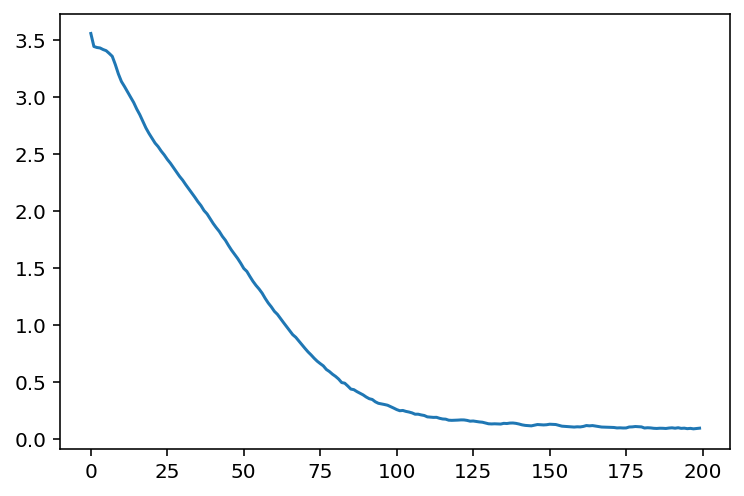

In [98]:
plt.plot(losses1)

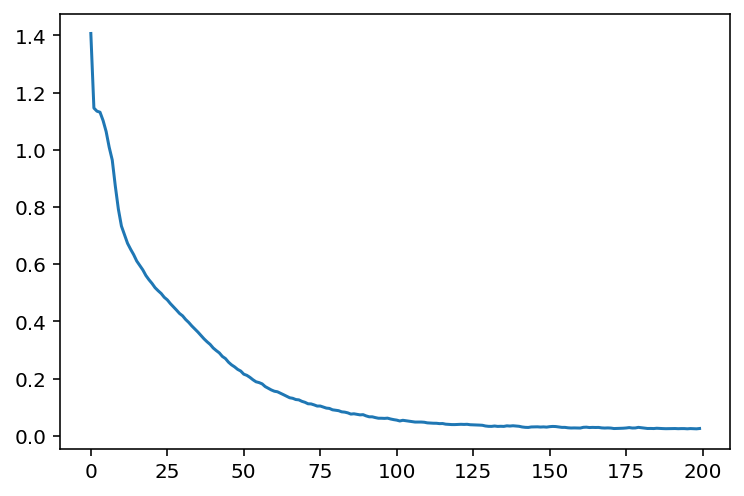

In [99]:
plt.plot(losses2)

## check errors using plotnine

/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


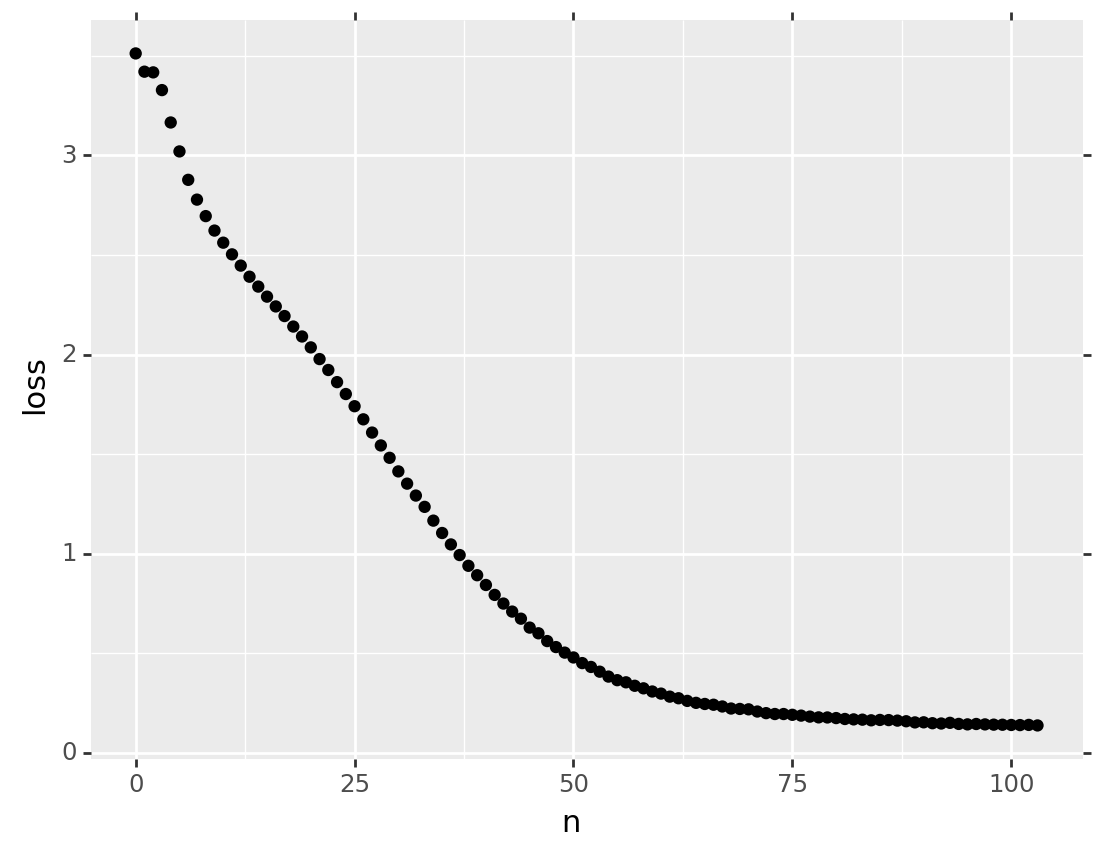

<ggplot: (8790427851826)>

In [62]:
ggplot(pd.DataFrame({'n':range(len(losses1)) , 'loss':losses1}) , aes(x = 'n' , y ='loss')) + geom_point()

## predicted vs realized

In [100]:
model.eval()

my_model(
  (relu): ReLU()
  (rnn): LSTM(168, 512, num_layers=2, dropout=0.1)
  (linear1): Linear(in_features=512, out_features=108, bias=True)
  (linear2): Linear(in_features=512, out_features=60, bias=True)
  (linear1b): Linear(in_features=108, out_features=108, bias=True)
  (linear2b): Linear(in_features=60, out_features=60, bias=True)
)

In [101]:
model.to(cpu)

my_model(
  (relu): ReLU()
  (rnn): LSTM(168, 512, num_layers=2, dropout=0.1)
  (linear1): Linear(in_features=512, out_features=108, bias=True)
  (linear2): Linear(in_features=512, out_features=60, bias=True)
  (linear1b): Linear(in_features=108, out_features=108, bias=True)
  (linear2b): Linear(in_features=60, out_features=60, bias=True)
)

In [102]:
y_pred1, y_pred2 = model(ppd_X[0].to(cpu))

In [103]:
reload(score2df)

<module 'score2df' from '/home/toshinao/PycharmProjects/deepjazz_in_a_file/score2df.py'>

In [104]:
df_scatter = score2df.predicted_vs_realized(y_pred1 , ppd_y1 , le1)

In [105]:
df_scatter.head()

,pred,realized
0,400.0,1600.0
1,300.0,300.0
2,500.0,500.0
3,1200.0,200.0
4,200.0,200.0


/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


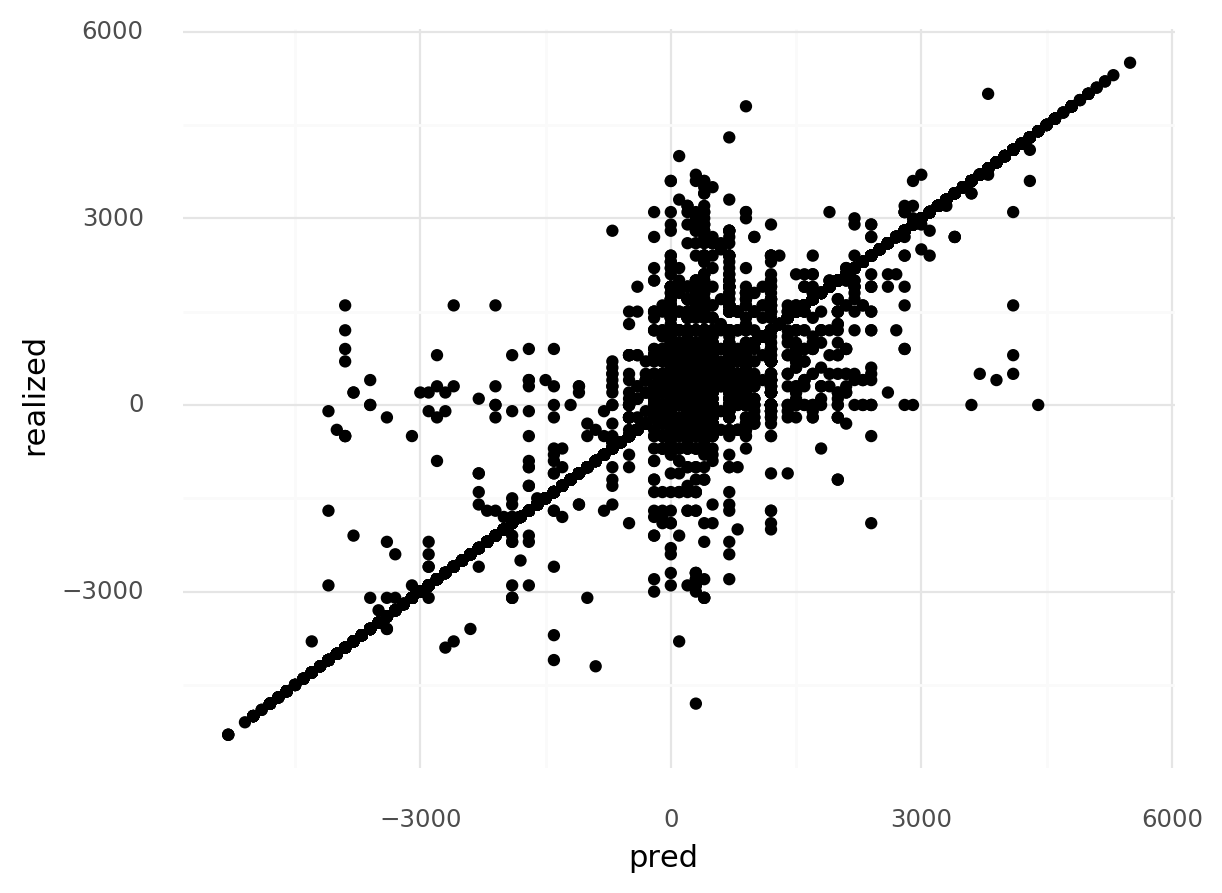

<ggplot: (8744484543580)>

In [106]:
ggplot(df_scatter , aes(x = 'pred', y = 'realized')) + geom_point() + theme_minimal()

In [107]:
df_scatter2 = score2df.predicted_vs_realized(y_pred2 , ppd_y2 , le2)

In [108]:
df_scatter2.describe()

,pred,realized
count,158025.000000,158025.000000
mean,0.176596,0.178153
std,0.305873,0.307135
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.250000,0.250000
max,6.000000,6.000000


/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 314'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/layer.py:449: UserWarning: geom_histogram : Removed 303 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/utils.py:553: Matplot

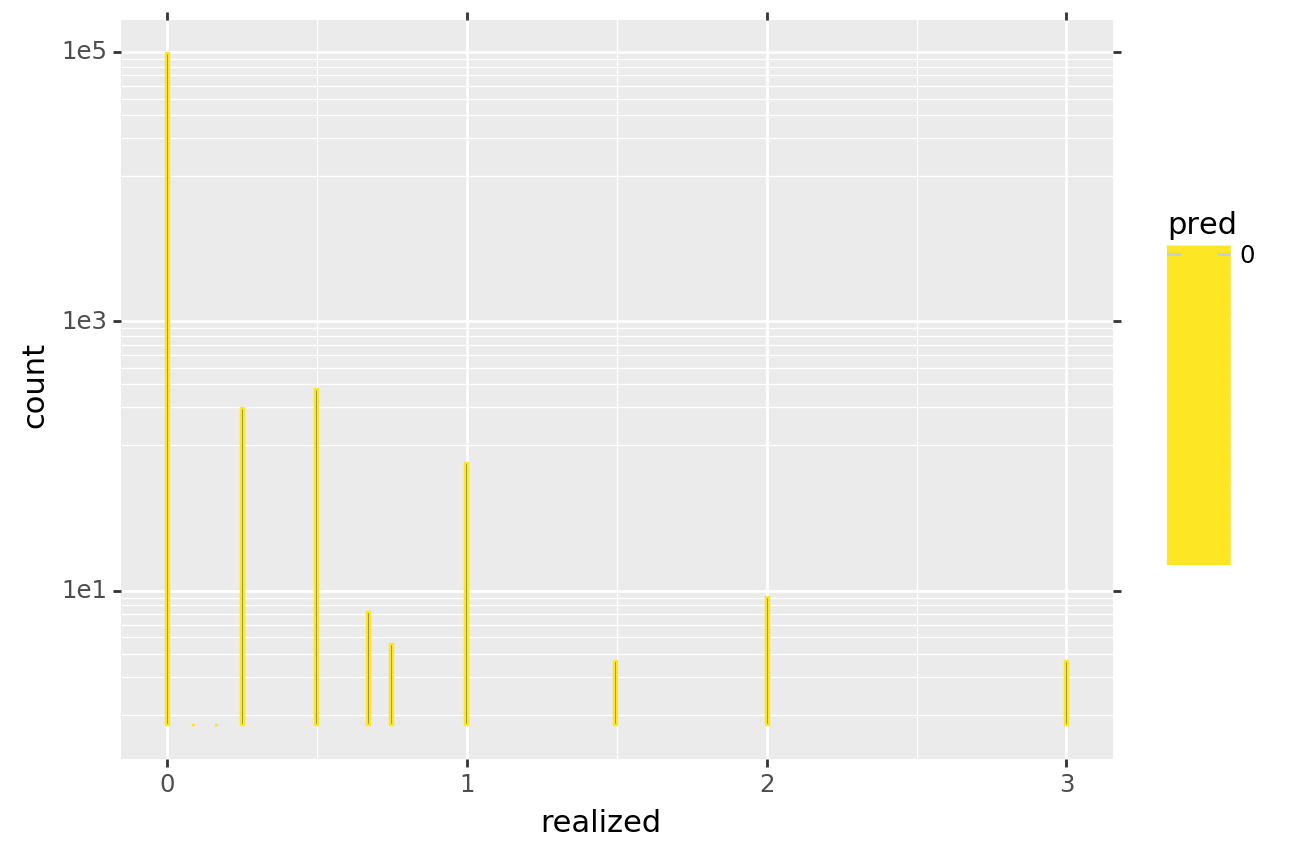

<ggplot: (8744484298858)>

In [109]:
ggplot(df_scatter2.query('pred == 0.0') , aes(x = 'realized' , color = "pred")) + geom_histogram() + scale_y_log10()# + facet_wrap('~pred' , scales = 'free') + theme_minimal()

In [110]:
ggplot(df_scatter2 , aes(x = 'realized' , color = "pred")) + \
geom_histogram() + scale_y_log10(breaks = range(10)) \
+ facet_wrap('~pred') \
+ coord_flip()\
+ scale_x_continuous(breaks = [i  for i in range(60)]) + theme_minimal()

/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: UserWarning: 'stat_bin()' using 'bins = 649'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']))
/home/toshinao/anaconda3/envs/test/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


KeyboardInterrupt: 

In [ ]:
ggplot(df_scatter2.query('pred in [0,0.25,0.5,0.75,1]') , aes(x = 'realized' , color = "pred")) + \
geom_histogram() + scale_y_log10() \
+ facet_wrap('~pred') \
+ coord_flip()\
+ scale_x_continuous(breaks = [i / 5 for i in range(60)]) + theme_minimal()

In [ ]:
ggplot(df_scatter2 , aes(x = 'pred', y = 'realized')) + geom_point() + theme_minimal()

# generating music

In [48]:
model.eval()

my_model(
  (relu): ReLU()
  (rnn): LSTM(109, 512, num_layers=2, dropout=0.1)
  (linear1): Linear(in_features=512, out_features=107, bias=True)
  (linear2): Linear(in_features=512, out_features=2, bias=True)
  (linear1b): Linear(in_features=107, out_features=107, bias=True)
  (linear2b): Linear(in_features=2, out_features=2, bias=True)
)

In [55]:
x_gen = np.zeros(input_size1 + input_size2 , dtype = "float32")
x_gen[0] = 1.
x_gen[input_size1 + 1] = 1.

x_gen = x_gen.reshape([1,1,-1])
x_gen = torch.tensor(x_gen).to(cpu)

In [56]:
def digitalize(x1 , x2):
    x_gen = np.zeros(input_size1 + input_size2 , dtype = "float32")
    x_gen[0] = x1[-1].detach().numpy().argmax(axis = 1)[0]
    x_gen[input_size1 + x2[-1].detach().numpy().argmax(axis = 1)[0]] = 1.
    x_gen = x_gen.reshape([1,1,-1])
    x_gen = torch.tensor(x_gen)
    return x_gen
    

In [57]:
model = model.to(cpu)

In [58]:
N_gen = 100

In [59]:
for i in range(N_gen):    
    if i % 10 ==0:
        display(i)
    x1, x2 = model.forward(x_gen)
    #x12 = torch.cat((x1 , x2) , dim = 2)
    x_gen = torch.cat([x_gen, digitalize(x1 ,x2)] , dim = 0)

0

10

20

30

40

50

60

70

80

90

%# old
for i in range(N_gen):    
    if i % 10 ==0:
        display(i)
    x1, x2 = model.forward(x_gen)
    x12 = torch.cat((x1 , x2) , dim = 2)
    x_gen = torch.cat([x_gen, x12[-1:]] , dim = 0)

In [60]:
x_gen.shape

torch.Size([101, 1, 109])

## alternative generation method(not working yet)

一番後ろだけアップデートするのでなく、まるごと（最初以外）置き換える手法も試してみる

In [ ]:
x_gen = np.zeros(input_size , dtype = "float32")

In [ ]:
x_gen[0] = 1.

In [ ]:
x_gen = x_gen.reshape([1,1,-1])

In [ ]:
x_gen = torch.tensor(x_gen).to(cpu)

In [ ]:
model = model.to(cpu)

In [ ]:
N_gen = 200

In [ ]:
for i in range(N_gen):    
    x1 = model.forward(x_gen)
    x_gen = torch.cat([x_gen[:1] , x1] , dim = 0)

In [ ]:
x_gen.shape

## to score

In [61]:
nx_gen = x_gen.cpu().detach().numpy()

In [62]:
nx1_gen = nx_gen[:,:,range(input_size1)]

In [63]:
nx2_gen = nx_gen[:,:,range(input_size1,  input_size1 + input_size2)]

In [64]:
xidx1_gen = nx1_gen.argmax(axis = 2).reshape(-1)

In [65]:
xidx2_gen = nx2_gen.argmax(axis = 2).reshape(-1)

In [66]:
shift1_gen= np.array( [float(le1.classes_[xidx1_gen[i]]) for i in range(xidx1_gen.shape[0])])

In [67]:
shift2_gen= np.array( [float(le2.classes_[xidx2_gen[i]]) for i in range(xidx2_gen.shape[0])])

In [68]:
from music21 import *

In [69]:
st1=stream.Stream()

In [70]:
#dt = 0.5
run_t = 0
base_note = note.Note("C5")
run_note = base_note

In [71]:
run_notes = []
#for i in range(15): #range(shift1_gen.shape[0]):
for i in range(shift1_gen.shape[0]):
    if i % 10 == 0:
        pass#display(i)
    
    run_shift = int(shift1_gen[i] / 100)
    run_dt = shift2_gen[i]
    display(run_dt)
    run_t = run_t + run_dt
    if i >= 57:
        pass #Pdb().set_trace()
    if run_dt != 0.:
        if i !=0: #len(run_notes) != 0:
            #display(",".join([x.nameWithOctave for x in run_notes]))
            st1.insert(run_t , chord.Chord(run_notes))
            display(run_notes)
            run_notes = []            
        if run_shift == 0:
            run_note = base_note
        else:                                      
            #run_note = base_note.transpose(interval.ChromaticInterval(run_shift))
            run_note = interval.ChromaticInterval(run_shift).transposeNote(base_note)
        base_note = run_note
        #run_note = base_note
        run_notes = [run_note]
    else:
        if run_shift != 0.:            
            #run_note = run_note.transpose(interval.ChromaticInterval(run_shift))
            run_note = interval.ChromaticInterval(run_shift).transposeNote(run_note)
        run_notes.append(run_note)
        
    #   if run_dt != 0 or run_shift !=0:            
    #st1.insert(run_t , run_note)

0.25

0.0

0.25

[<music21.note.Note B>, <music21.note.Note B->]

0.25

[<music21.note.Note B->]

0.25

[<music21.note.Note A>]

0.25

[<music21.note.Note G#>]

0.25

[<music21.note.Note G>]

0.25

[<music21.note.Note F#>]

0.25

[<music21.note.Note F>]

0.25

[<music21.note.Note E>]

0.25

[<music21.note.Note E->]

0.25

[<music21.note.Note D>]

0.25

[<music21.note.Note C#>]

0.25

[<music21.note.Note C>]

0.25

[<music21.note.Note B>]

0.25

[<music21.note.Note B->]

0.25

[<music21.note.Note A>]

0.25

[<music21.note.Note G#>]

0.25

[<music21.note.Note G>]

0.25

[<music21.note.Note F#>]

0.25

[<music21.note.Note F>]

0.25

[<music21.note.Note E>]

0.25

[<music21.note.Note E->]

0.25

[<music21.note.Note D>]

0.25

[<music21.note.Note C#>]

0.25

[<music21.note.Note C>]

0.25

[<music21.note.Note B>]

0.25

[<music21.note.Note B->]

0.25

[<music21.note.Note A>]

0.25

[<music21.note.Note G#>]

0.25

[<music21.note.Note G>]

0.25

[<music21.note.Note F#>]

0.25

[<music21.note.Note F>]

0.25

[<music21.note.Note E>]

0.25

[<music21.note.Note E->]

0.25

[<music21.note.Note D>]

0.25

[<music21.note.Note C#>]

0.25

[<music21.note.Note C>]

0.25

[<music21.note.Note B>]

0.25

[<music21.note.Note B->]

0.25

[<music21.note.Note A>]

0.25

[<music21.note.Note G#>]

0.25

[<music21.note.Note G>]

0.25

[<music21.note.Note F#>]

0.25

[<music21.note.Note F>]

0.25

[<music21.note.Note E>]

0.25

[<music21.note.Note E->]

0.25

[<music21.note.Note D>]

0.25

[<music21.note.Note C#>]

0.25

[<music21.note.Note C>]

0.25

[<music21.note.Note B>]

0.25

[<music21.note.Note B->]

0.25

[<music21.note.Note A>]

0.25

[<music21.note.Note G#>]

0.25

[<music21.note.Note G>]

0.25

[<music21.note.Note F#>]

0.25

[<music21.note.Note F>]

0.25

[<music21.note.Note E>]

0.25

[<music21.note.Note E->]

0.25

[<music21.note.Note D>]

0.25

[<music21.note.Note C#>]

0.25

[<music21.note.Note C>]

0.25

[<music21.note.Note B>]

0.25

[<music21.note.Note B->]

0.25

[<music21.note.Note A>]

0.25

[<music21.note.Note G#>]

0.25

[<music21.note.Note G>]

0.25

[<music21.note.Note F#>]

0.25

[<music21.note.Note F>]

0.25

[<music21.note.Note E>]

0.25

[<music21.note.Note E->]

0.25

[<music21.note.Note D>]

0.25

[<music21.note.Note C#>]

0.25

[<music21.note.Note C>]

0.25

[<music21.note.Note B>]

0.25

[<music21.note.Note B->]

0.25

[<music21.note.Note A>]

0.25

[<music21.note.Note G#>]

0.25

[<music21.note.Note G>]

0.25

[<music21.note.Note F#>]

0.25

[<music21.note.Note F>]

0.25

[<music21.note.Note E>]

0.25

[<music21.note.Note E->]

0.25

[<music21.note.Note D>]

0.25

[<music21.note.Note C#>]

0.25

[<music21.note.Note C>]

0.25

[<music21.note.Note B>]

0.25

[<music21.note.Note B->]

0.25

[<music21.note.Note A>]

0.25

[<music21.note.Note G#>]

0.25

[<music21.note.Note G>]

0.25

[<music21.note.Note F#>]

0.25

[<music21.note.Note F>]

0.25

[<music21.note.Note E>]

0.25

[<music21.note.Note E->]

0.25

[<music21.note.Note D>]

0.25

[<music21.note.Note C#>]

0.25

[<music21.note.Note C>]

0.25

[<music21.note.Note B>]

0.25

[<music21.note.Note B->]

0.25

[<music21.note.Note A>]

In [72]:
from IPython.display import Image

In [73]:
Image(filename=st1.write('lily.png'))

LilyTranslateException: Cannot find a copy of Lilypond installed on your system. Please be sure it is installed. And that your environment.UserSettings()['lilypondPath'] is set to find it.

## to midi file

In [74]:
st1.write('midi', fp ='tmp/rnn_generated_1221.midi' )

'tmp/rnn_generated_1221.midi'

In [ ]:
import pygame
freq = 44100    # audio CD quality
bitsize = -16   # unsigned 16 bit
channels = 2    # 1 is mono, 2 is stereo
buffer = 1024    # number of samples
pygame.mixer.init(freq, bitsize, channels, buffer)
pygame.mixer.music.set_volume(0.8)

In [ ]:
sp = midi.realtime.StreamPlayer(st1)
sp.play()

In [ ]:
st1.show('midi')

## sandbox

In [ ]:
st2 = stream.Stream()

In [ ]:
st2.insert(0 , chord.Chord([note.Note('C5') , note.Note('D5'), note.Note('F5') ,note.Note('F6'),note.Note('A7')]))

In [ ]:
st2.insert(0 , chord.Chord([note.Note('C5')])) 

In [ ]:
run_notes

In [ ]:
st2.insert(0 , chord.Chord(run_notes))

In [ ]:
Image(filename=st2.write('lily.png'))

# 比較用にlinear modelを用いてgenerate

In [ ]:
df_stage.columns

In [ ]:
sequence_gen = [800,200,0]

In [ ]:
N_gen = 100

noise_strength = 0.1 #1にするとmseの誤差項の大きさをそのまま使う

In [ ]:
for i in range(N_gen):
    df_gen = pd.DataFrame({'dcent_lag1':[sequence_gen[-1]] , 'dcent_lag2':[sequence_gen[-2]] , 'dcent_lag3':[sequence_gen[-3]]})
    sequence_gen.append(int(res.predict(df_gen + noise_strength * np.sqrt(res.mse_resid) * np.random.normal()) / 100) * 100)

In [ ]:
sequence_gen[0:20]

In [ ]:
shift_cumsum_gen = np.array(sequence_gen).cumsum() 

In [ ]:
st1=stream.Stream()

In [ ]:
dt = 0.5
base_note = note.Note("C5")

In [ ]:
for i in range(shift_cumsum_gen.shape[0]):
    run_shift = int(shift_cumsum_gen[i] / 100)
    run_dt = int()
    if run_shift == 0:
        run_note = base_note
    else:                                      
        run_note = base_note.transpose(interval.ChromaticInterval(run_shift))
    st1.insert(0.5 * i , run_note)

In [ ]:
run_shift == 0

In [ ]:
from IPython.display import Image

In [ ]:
Image(filename=st1.write('lily.png'))

## to midi file

In [ ]:
st1.write('midi', fp ='tmp/tmp.midi' )

## sandbox

In [ ]:
tmp = note.Note("D5")

In [ ]:
tmp.transpose(interval.GenericInterval(1))

In [ ]:
x = torch.cat([x0, x1] , dim = 0)

In [ ]:
x2 = model.forward(x)

In [ ]:
x2.shape

In [ ]:
x2[-2:-1].shape

In [ ]:
x = torch.cat([x, x2[-2:-1]] , dim = 0)

# my own try and error　（この節のプロセスは必要ない）

# Before starting the note...
Useful tips for jupyter notebook:

https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [ ]:
#http://d.hatena.ne.jp/naraba/20121201/p1
#http://web.mit.edu/music21/doc/usersGuide/usersGuide_01_installing.html

from music21 import *
#environment.set('musicxmlPath' , r"C:\Program Files (x86)\Finale NotePad 2012\Finale NotePad.exe")
#configure.run()
#environment.keys()
#environment.get('musicxmlPath')

楽譜を表示するためのおまじない

参考URL:https://groups.google.com/forum/#!topic/music21list/FmU6HeNm7AM


In [ ]:
us = environment.UserSettings() #不必要

#us.create()
us['musicxmlPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'
us['musescoreDirectPNGPath'] = r'C:\Program Files (x86)\MuseScore 2\bin\MuseScore.exe'

# install musescore in linux (apt-getでインストールするのがポイント）

For all those who will struggle with displaying scores from music21 within Jupyter Notebook on Linux (e.g. Ubuntu), follow these steps:
https://stackoverflow.com/questions/49939275/python-music21-library-create-png-from-stream/49945456#49945456

MuseScoreのバージョンが2から3にあがっていたので、初期設定のままではうごきませんでした。
https://qiita.com/nofrmm/items/c3662555b145f6b42d92

#us.create()
us['musicxmlPath'] = r'/snap/bin/musescore'
us['musescoreDirectPNGPath'] = r'/snap/bin/musescore'

In [ ]:
environment.set("musescoreDirectPNGPath", "/usr/bin/musescore")
#environment.set("musicxmlPath", "/snap/bin/musescore")

#us.create()
us['musicxmlPath'] = r'/snap/bin/musescore.mscore'
us['musescoreDirectPNGPath'] = r'/snap/bin/musescore.mscore'

In [ ]:
%load_ext music21.ipython21　#不必要